## Import

In [37]:
# Matplotlib
import matplotlib.pyplot
# Tensorflow
import tensorflow
# Numpy and Pandas
import numpy
import pandas
# Ohter import
import sys
import random

## Be sure to used Tensorflow 2.0

In [6]:
assert hasattr(tensorflow, "function") # Be sure to use tensorflow 2.0

## Load the dataset: Fashion MNIST

![](https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png)

In [41]:
from sklearn.preprocessing import StandardScaler

# Fashio MNIST
fashion_mnist = tensorflow.keras.datasets.fashion_mnist
(images, targets), (images_test, targets_test) = fashion_mnist.load_data()

# Get only a subpart of the dataset
images = images[:10000]
targets = targets [:10000]

# Reshape the dataset and convert to float
images = images.reshape(-1, 784)
images = images.astype(float)
images_test = images_test.reshape(-1, 784)
images_test = images_test.astype(float)

scaler = StandardScaler()
images = scaler.fit_transform(images)
images_test = scaler.transform(images_test)

print(images.shape)
print(targets.shape)

image_index = random.randint(0, 10000) #random image index
print(images_test[image_index])   #transform
print(images[image_index])    #fit transform

(10000, 784)
(10000,)
[-1.42697062e-02 -2.64557876e-02 -2.94889973e-02 -4.63554198e-02
 -6.15661671e-02 -7.64112525e-02 -1.05095787e-01 -1.64101924e-01
 -2.39869566e-01 -3.69296660e-01 -5.70632320e-01 -6.90909199e-01
 -7.58238196e-01 -7.29853961e-01 -7.02843487e-01 -7.60951853e-01
 -7.43517324e-01 -6.48883000e-01 -4.69989985e-01 -3.20858358e-01
 -2.08827185e-01  1.02986772e+01  1.33969820e+01 -9.30206512e-02
 -6.72584935e-02  4.00666104e-01 -3.36809888e-02 -1.59186338e-02
 -1.81321955e-02 -2.29720933e-02 -3.36567894e-02 -5.81404269e-02
 -8.28721299e-02 -1.30532642e-01 -2.46466803e-01 -3.59054230e-01
 -4.83350790e-01 -6.39092393e-01 -8.35754435e-01 -9.99171823e-01
 -1.08347998e+00 -1.07712864e+00 -1.05873395e+00 -1.08246733e+00
 -1.05082060e+00 -9.44366871e-01 -7.81932698e-01 -1.39964004e-01
  1.64113610e+00  3.79269330e+00  6.07518435e+00  3.30197987e+00
 -1.15659565e-01 -8.70793254e-02 -6.10029772e-02 -3.31208755e-02
 -1.96475660e-02 -2.79387835e-02 -4.81181013e-02 -7.61725262e-02
 -1

## Plot one of the data

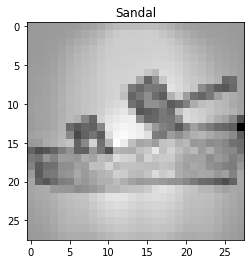

In [42]:
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
                 "Shirt", "Sneaker", "Bag", "Ankle boot"
]
# Plot one image
matplotlib.pyplot.imshow(numpy.reshape(images[12], (28, 28)), cmap="binary")
matplotlib.pyplot.title(targets_names[targets[13]])
matplotlib.pyplot.show()

# Create the model
![](images/simple_nn.png)

# Add The Layers

In [45]:
# Flatten
model = tensorflow.keras.models.Sequential()

# Add the layers
model.add(tensorflow.keras.layers.Dense(256, activation="relu"))
model.add(tensorflow.keras.layers.Dense(128, activation="relu"))
model.add(tensorflow.keras.layers.Dense(10, activation="softmax"))

model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

[[0.2450204  0.22671463 0.18038048 0.06096771 0.04424382 0.02913094
  0.08819942 0.02258984 0.01906894 0.08368374]] [9]


## Model Summary

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             multiple                  200960    
_________________________________________________________________
dense_13 (Dense)             multiple                  32896     
_________________________________________________________________
dense_14 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [47]:
# Compile the model
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"]
)

## Train the model

In [48]:
history = model.fit(images, targets, epochs=10, validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 66us/sample - loss: 1.8244 - accuracy: 0.4126 - val_loss: 1.3536 - val_accuracy: 0.5775
Epoch 2/10
8000/8000 [==============================] - 0s 54us/sample - loss: 1.1561 - accuracy: 0.6539 - val_loss: 1.0436 - val_accuracy: 0.6690
Epoch 3/10
8000/8000 [==============================] - 0s 55us/sample - loss: 0.9407 - accuracy: 0.7129 - val_loss: 0.9017 - val_accuracy: 0.7120
Epoch 4/10
8000/8000 [==============================] - 0s 53us/sample - loss: 0.8279 - accuracy: 0.7445 - val_loss: 0.8181 - val_accuracy: 0.7345
Epoch 5/10
8000/8000 [==============================] - 0s 56us/sample - loss: 0.7555 - accuracy: 0.7619 - val_loss: 0.7614 - val_accuracy: 0.7570
Epoch 6/10
8000/8000 [==============================] - 0s 54us/sample - loss: 0.7043 - accuracy: 0.7751 - val_loss: 0.7203 - val_accuracy: 0.7665
Epoch 7/10
8000/8000 [==============================] - 0s 54us/sample

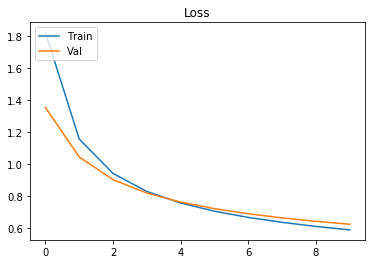

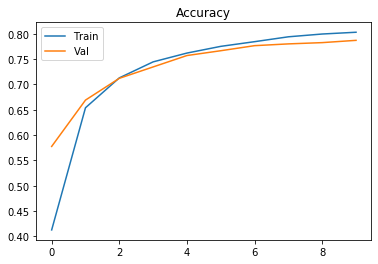

In [49]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

loss_val_curve = history.history["val_loss"]
acc_val_curve = history.history["val_accuracy"]

matplotlib.pyplot.plot(loss_curve, label="Train")
matplotlib.pyplot.plot(loss_val_curve, label="Val")
matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title("Loss")
matplotlib.pyplot.show()

matplotlib.pyplot.plot(acc_curve, label="Train")
matplotlib.pyplot.plot(acc_val_curve, label="Val")
matplotlib.pyplot.legend(loc='upper left')
matplotlib.pyplot.title("Accuracy")
matplotlib.pyplot.show()

In [50]:
loss, acc = model.evaluate(images_test, targets_test)
print("Test Loss", loss)
print("Test Accuracy", acc)

10000/10000 [==============================] - 0s 26us/sample - loss: 0.6385 - accuracy: 0.7828
Test Loss 0.6384793402671814
Test Accuracy 0.7828
